# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Unnamed column seems to be no use so dropping the column

In [3]:
# displaying the shape of the data
df.shape

(18249, 14)

we have 18249 rows and 14 columns Avg price is our target column

in problem statement, we have to predict avg Price which is our target .
this is a regression problem.

In [4]:
#checking the datatypes
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

All features have float datatypes except region, type and date they have object datatypes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


we can see that there are no any values.

In [6]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

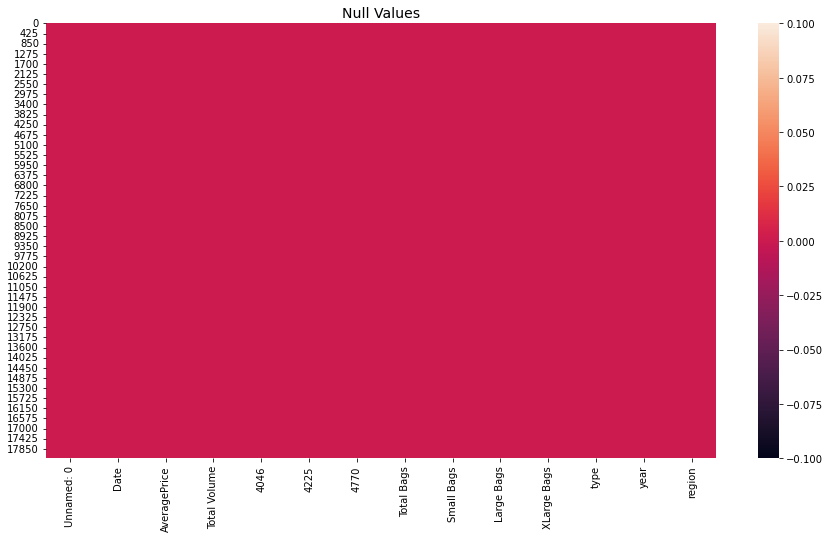

In [7]:
#plotting the heatmap for checking null values
plt.figure(figsize=(15,8))
plt.title('Null Values',fontsize=14)
sns.heatmap(df.isnull());

No any null value in dataset.

In [8]:
#stats
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


 We can see in Large Bages,XLarge Bags and 4770 Hass Avacado the Minimun values is Zero.

Our target Attribute AveragePrice is Normally Distributed.

Some Features are highly Right skewed like 4046,4225,Total bags etc.

In [9]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [10]:
# dropping the unnecessary col
df_1 = df.drop(['Unnamed: 0','Date','year'],axis=1)

Dropped Unnamed column bcz it is just a counting number but has no any significance.
Droppend date column because we have extracted the Day, Month, Year seperatly from Date column.
Dropped year column because we get same columns Year y feature Extraction from our Date Column.

# checking corr

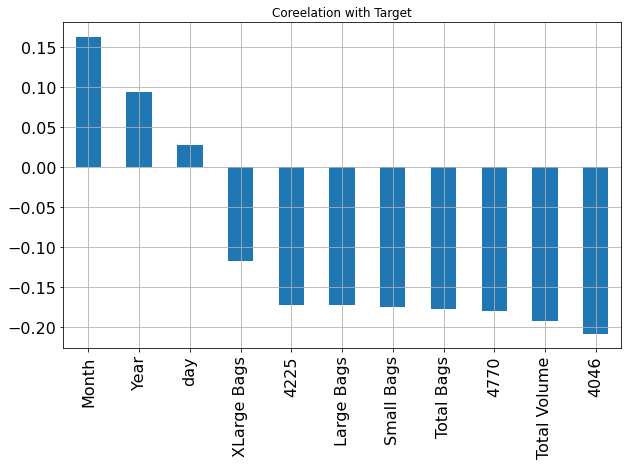

In [11]:
df_1.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=16);


We can see that only few features Feature positivly correlated with our Target Attribute AveragePrice.

But the correlation is not very strong enough.

Mostly features are negativly correlated with our Target attribute.

# Categorical Columns

In [12]:
df_1['type'].unique()
## There is only two unique Value in Type columns which is conventional, we can drop.

array(['conventional', 'organic'], dtype=object)

In [13]:
df_1['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Data Visualization

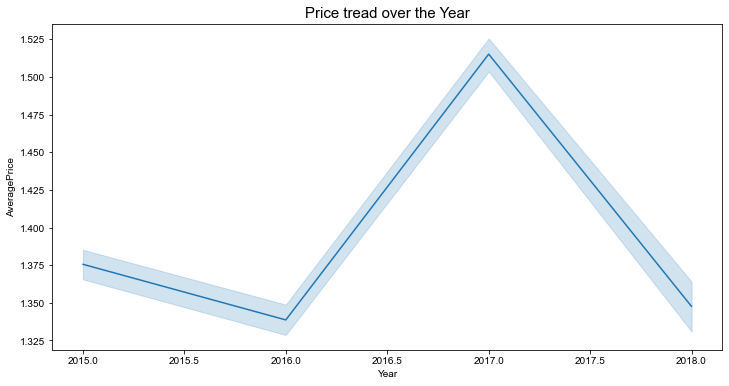

In [14]:
plt.figure(figsize=(12,6))
plt.title('Price tread over the Year',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_1['Year'],df_1['AveragePrice'],data=df_1);

There is a clear sign that prices of Avacado rises from 2016 to 2017.

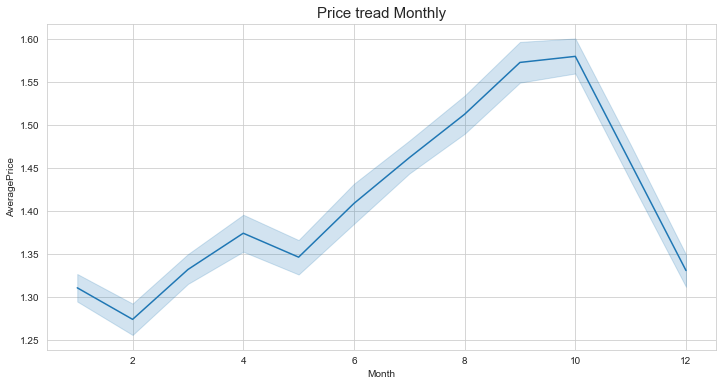

In [15]:
plt.figure(figsize=(12,6))
plt.title('Price tread Monthly',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_1['Month'],df_1['AveragePrice'],data=df_1);

we can see that the average price of Avacado rises in 5th to 10th Months of the year.

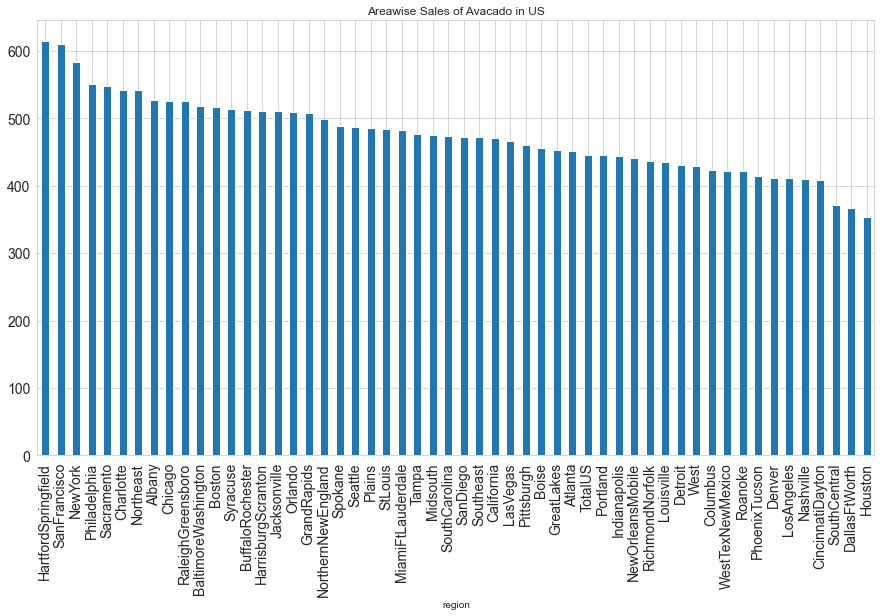

In [16]:
df_1.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),title='Areawise Sales of Avacado in US',fontsize=14);


Here we can see the trend of sales of Avacado in differen cities of US.
Houston has least consumption/demand for Avacado. Hartfordsprigfield has high consumption/demand for Avacado

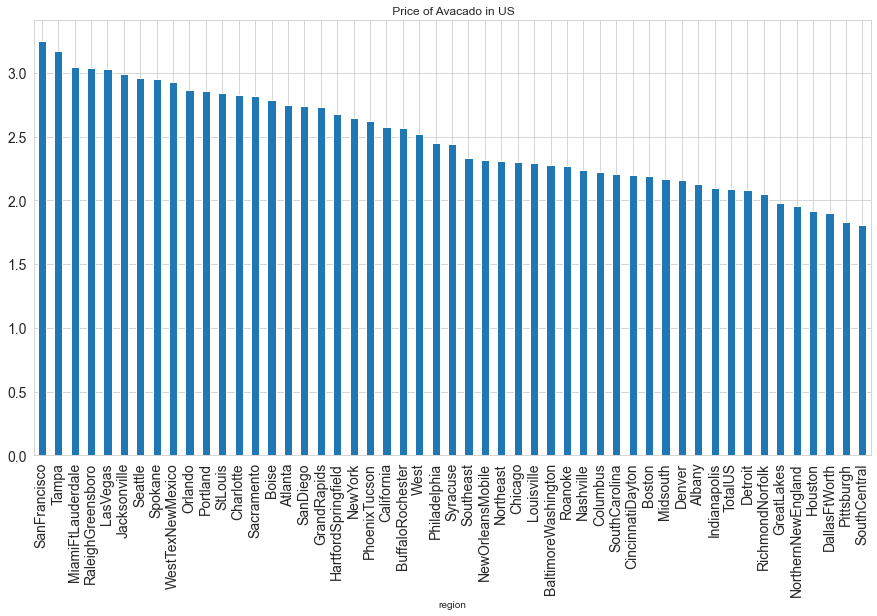

In [17]:
df_1.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(15,8),title=' Price of Avacado in US',fontsize=14);


We can see that sanFrancisco has highest price of Avocado and SouthCentral has the lowest price of Avocado in USA.

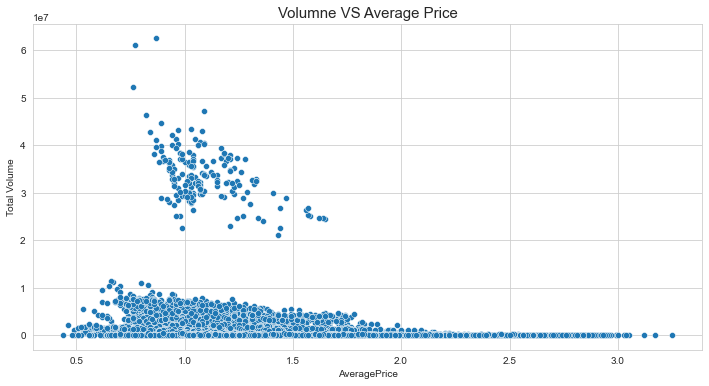

In [18]:
plt.figure(figsize=(12,6))
plt.title('Volumne VS Average Price',fontsize=15)
sns.scatterplot(df_1['AveragePrice'],df_1['Total Volume'],data=df_1);

We can observe that there is a constant line we get between Total Volumne and Average PRice.

Some outliers we can detect in Total Volumne

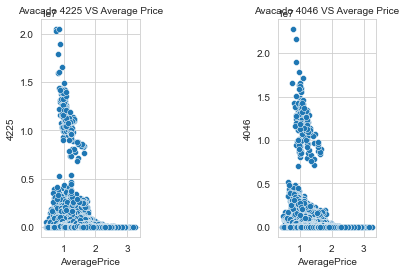

In [19]:
plt.subplot(1,3,1)
plt.title('Avacado 4225 VS Average Price',fontsize=10)
sns.scatterplot(df_1['AveragePrice'],df_1['4225'],data=df_1);

plt.subplot(1,3,3)
plt.title('Avacado 4046 VS Average Price',fontsize=10)
sns.scatterplot(df_1['AveragePrice'],df_1['4046'],data=df_1);

Two Different Avacado with Different Hass Code shows almost similar Average price.

We can conclude that both Hass Avacado has similar Average price but they are tagged differently.

# Plotting all possible graphs by pairplot

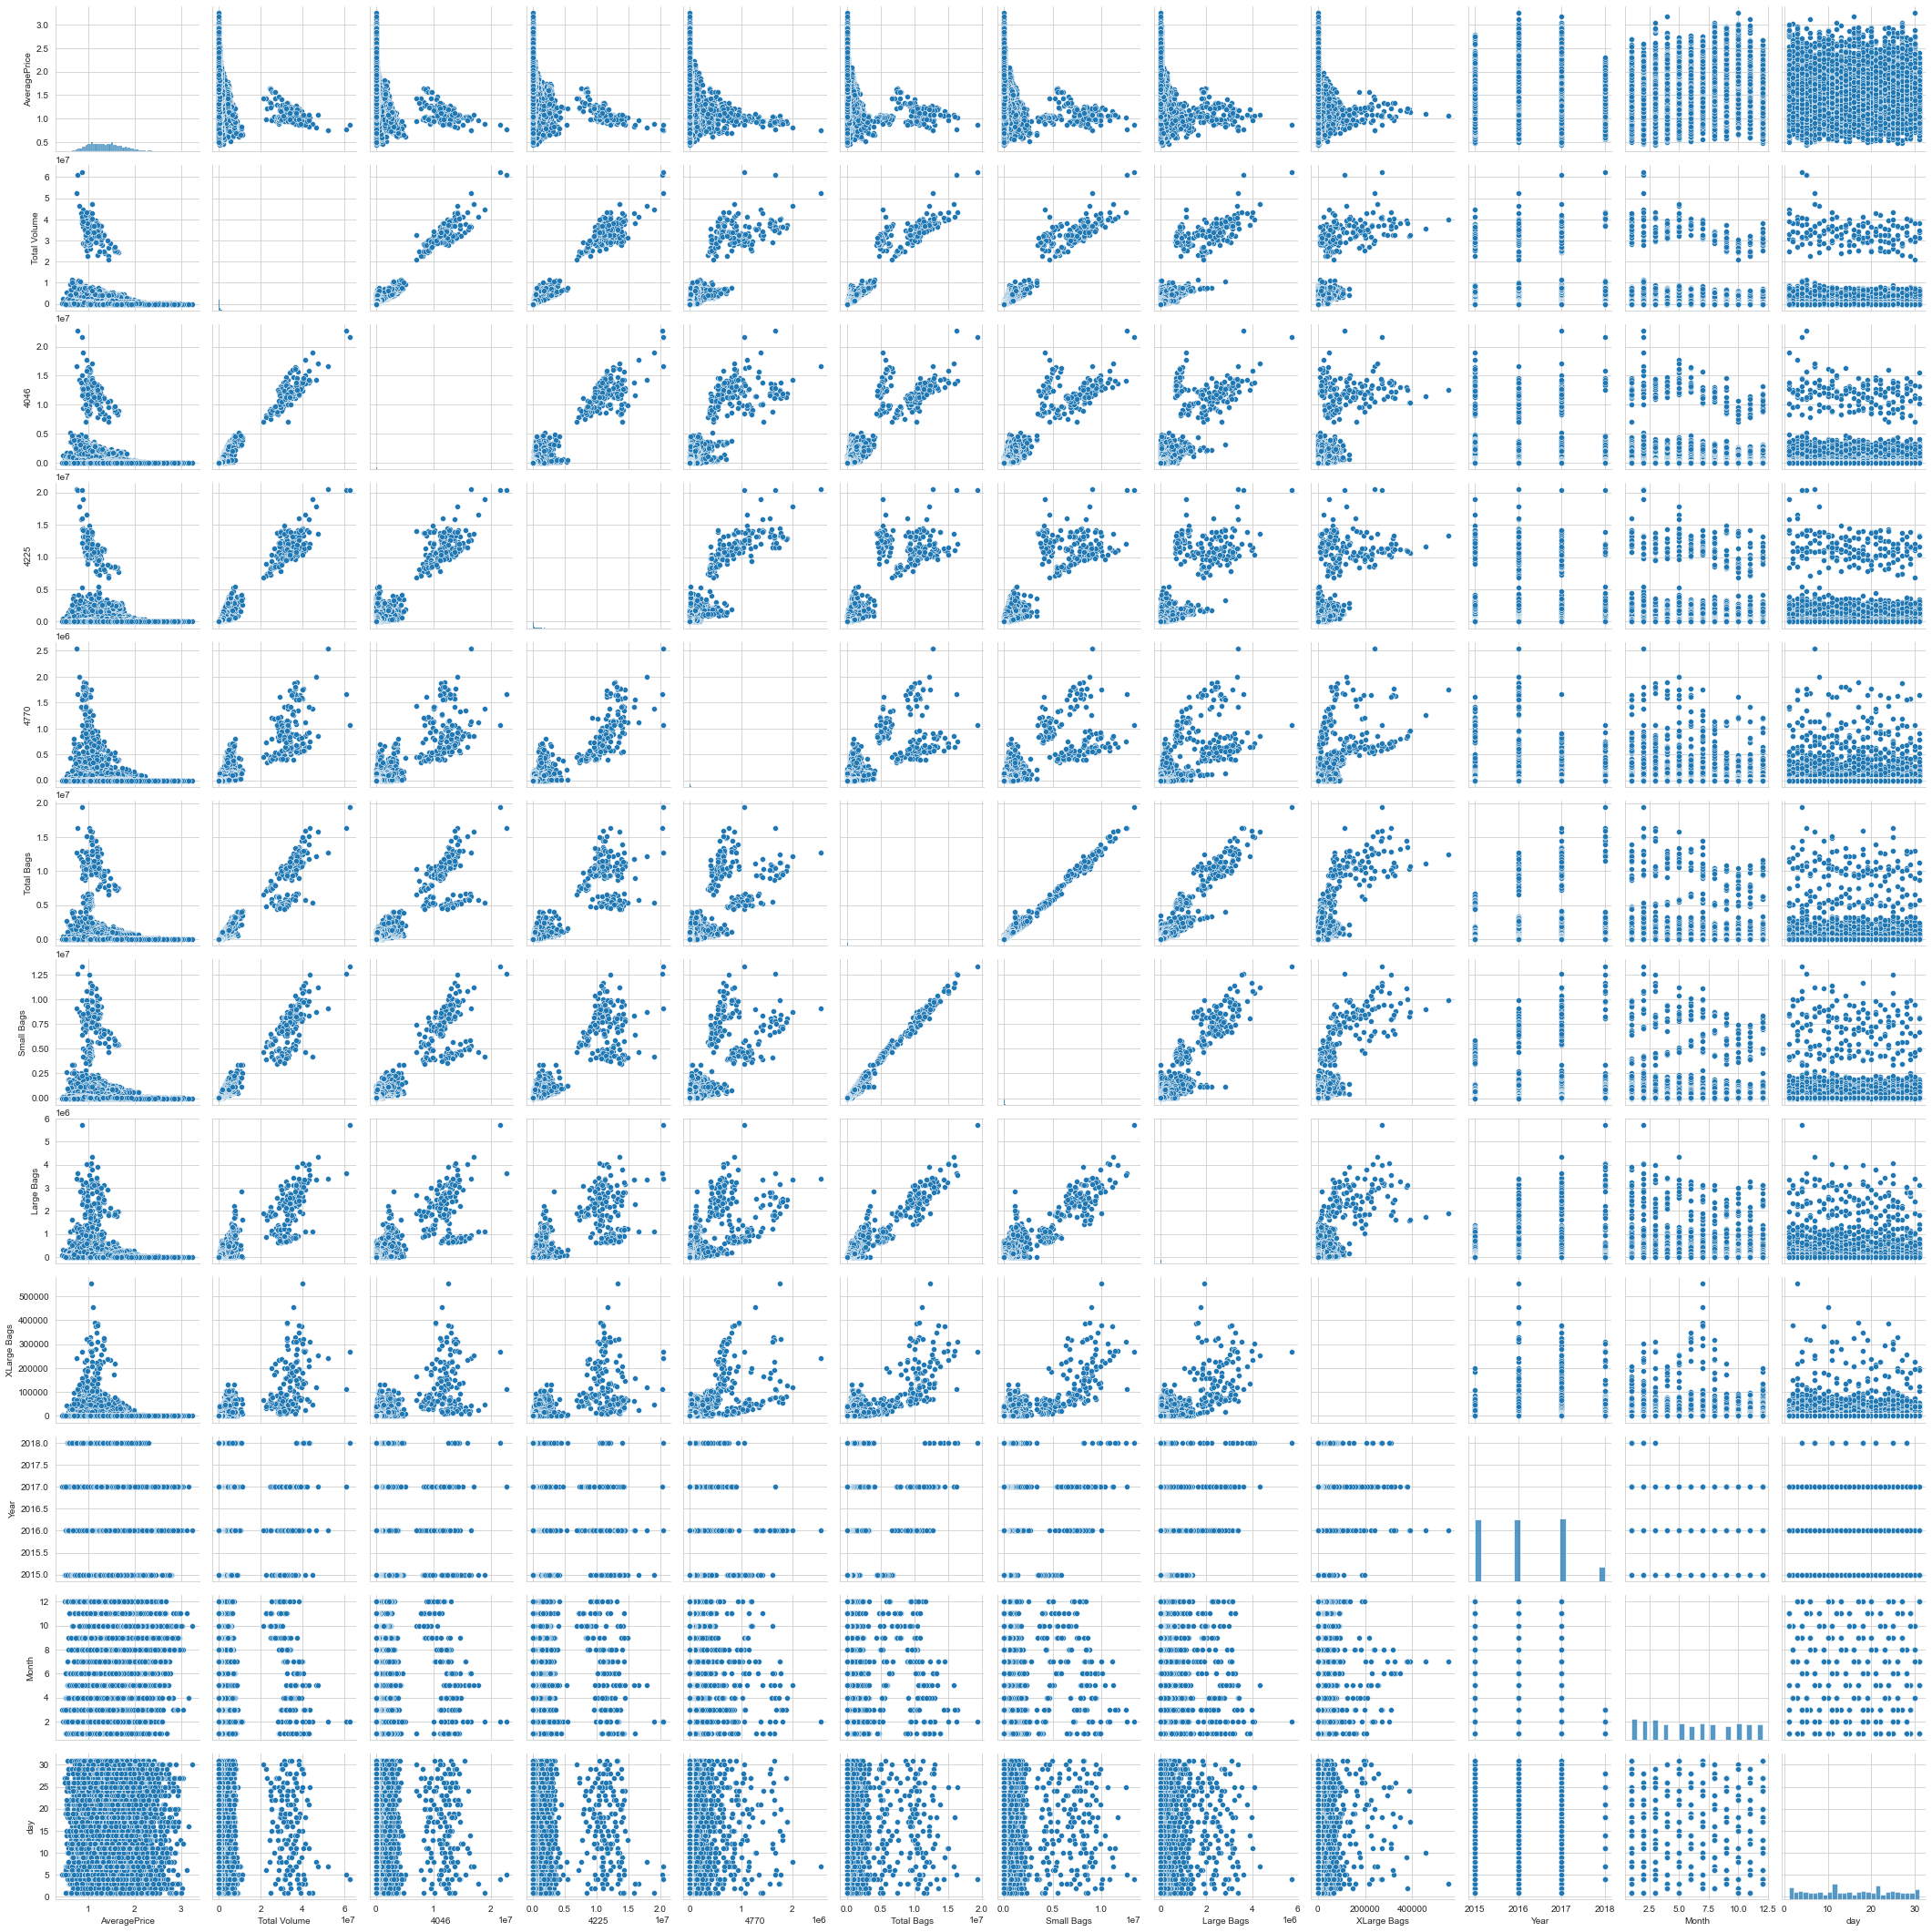

In [20]:
sns.pairplot(df_1)

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'.

These fields are some what showing positive or neutral correlation with each other.

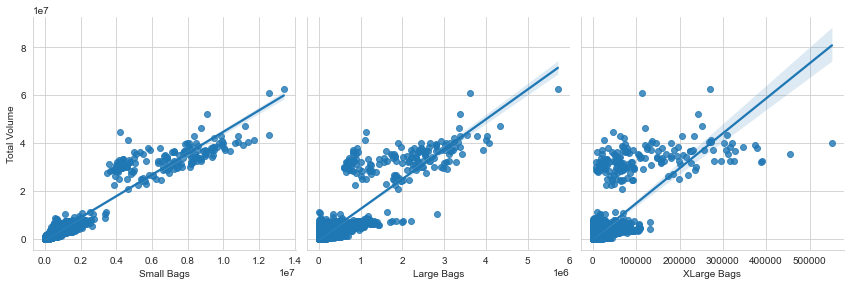

In [21]:
sns.pairplot(df_1,x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],y_vars='Total Volume',aspect=1,size=4,kind='reg',);

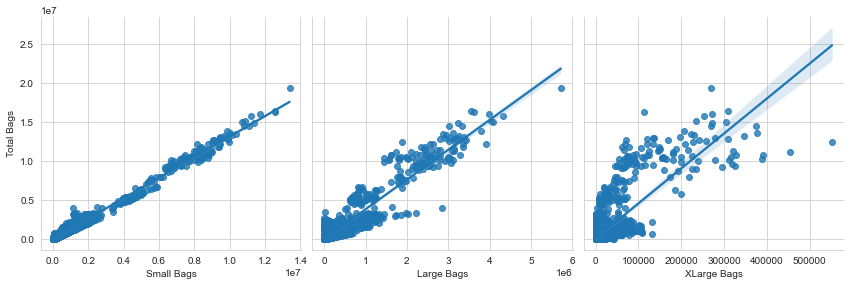

In [22]:
sns.pairplot(df_1, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=4, aspect=1, kind='reg');

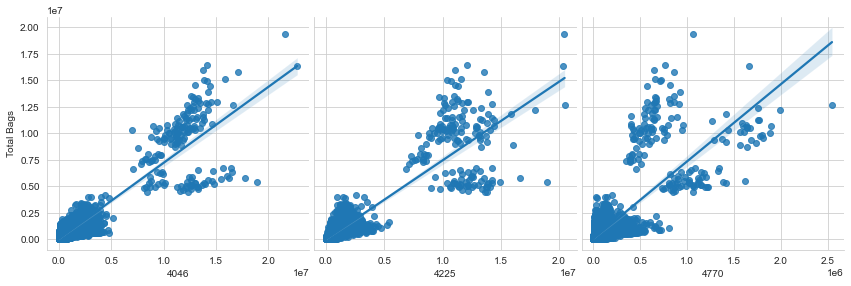

In [23]:
sns.pairplot(df_1, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', size=4, aspect=1, kind='reg');

# Data Distribution

In [24]:
df_1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

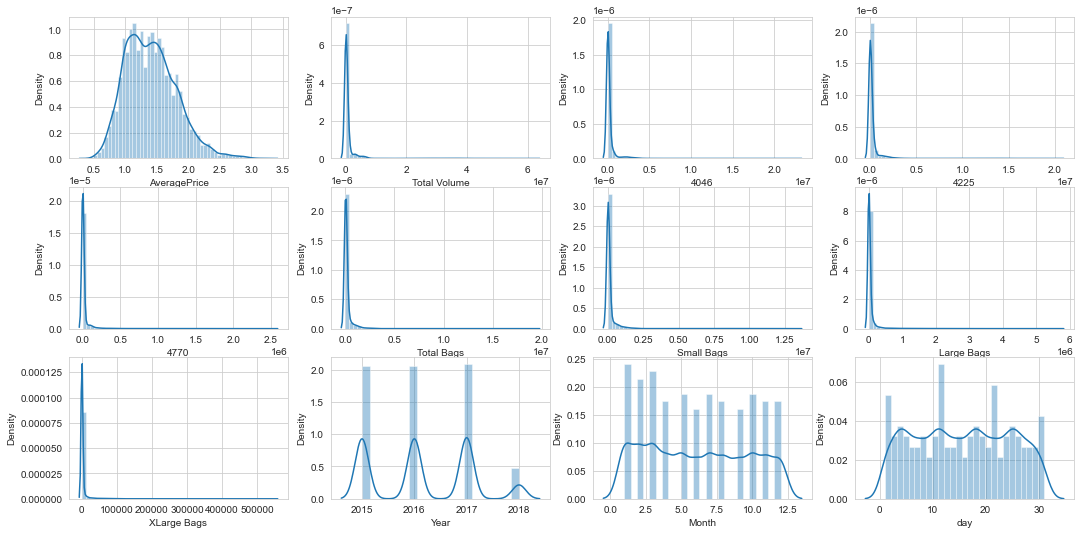

In [25]:
dist=df_1.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();  


We can see that Our target attribute Average Price is Normally Distributed.

Total Volume,4046,4225,4770 Total bags,small bags,Large Bags and Xlarge Bags are Right Skewed.

All the right skewed distributed data has majority the values near to zero.

# Outliers Detection

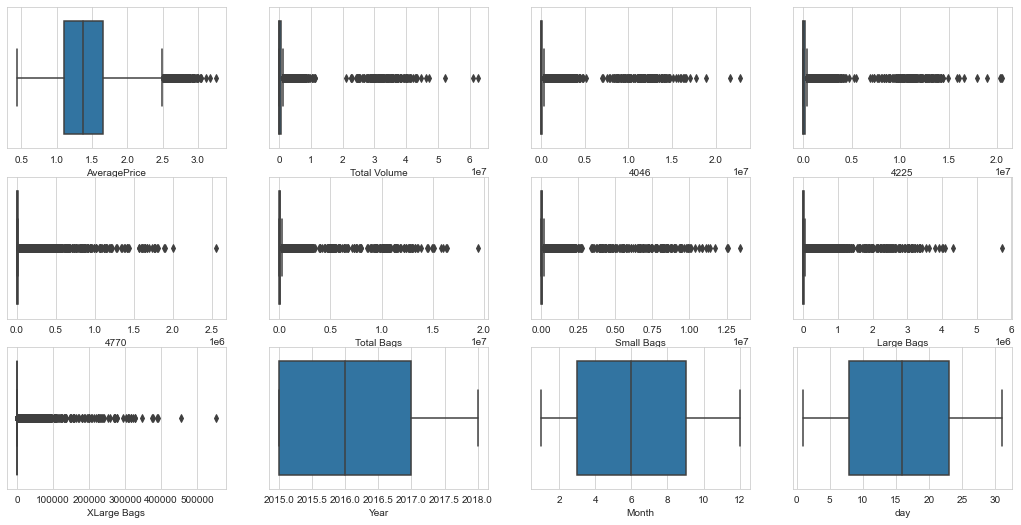

In [26]:
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();


There is a huge numbers of outliers present in our Dataset.

We can remove the outliers using IQR or Zscore method.

In [27]:
df_1.shape

(18249, 14)

### Removing Outliers by IQR Method

In [28]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

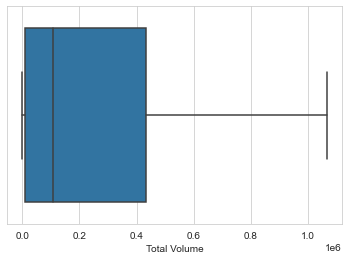

In [29]:
replace_outlier(df_1,'Total Volume')

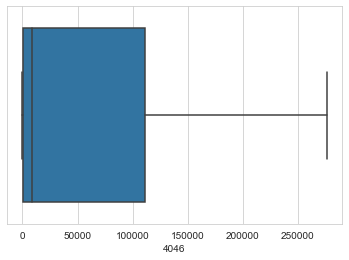

In [30]:
replace_outlier(df_1,'4046')

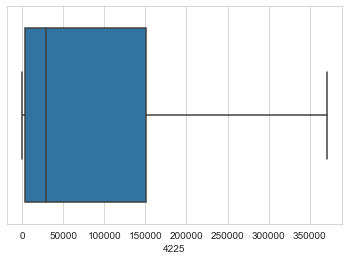

In [31]:
replace_outlier(df_1,'4225')

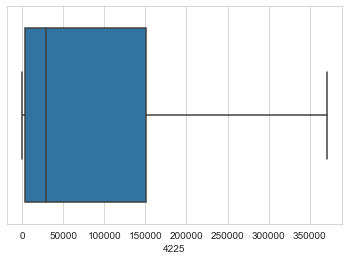

In [32]:
replace_outlier(df_1,'4225')

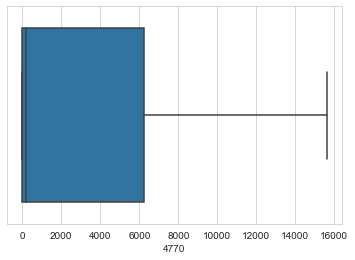

In [33]:
replace_outlier(df_1,'4770')

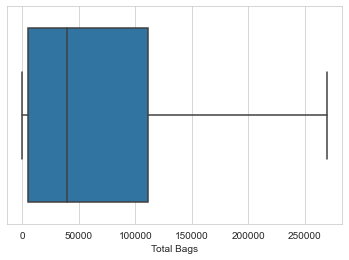

In [34]:
replace_outlier(df_1,'Total Bags')

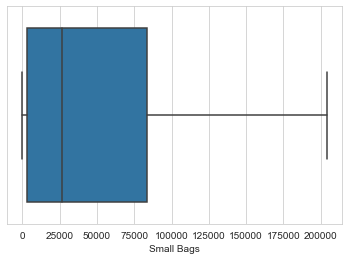

In [35]:
replace_outlier(df_1,'Small Bags')

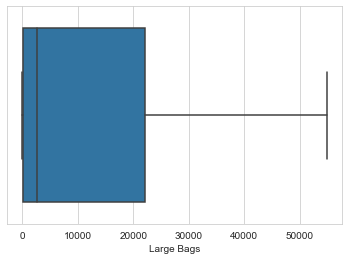

In [36]:
replace_outlier(df_1,'Large Bags')

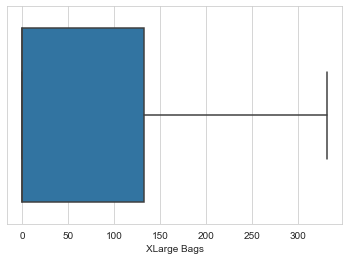

In [37]:
replace_outlier(df_1,'XLarge Bags')

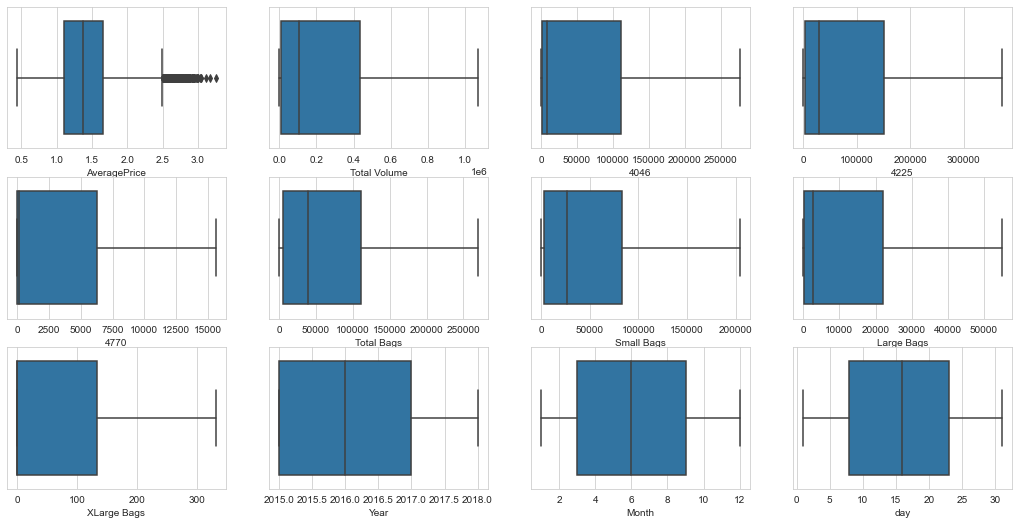

In [38]:
#Box plot after outliers removal
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();

## Skewness time


In [39]:
df_1.skew()

AveragePrice    0.580303
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
Year            0.215339
Month           0.106617
day             0.014310
dtype: float64

### Removing skewness using log1p transformation

In [40]:
for i in dist:
    if df_1[i].skew()>0.55:
        df_1[i]=np.log1p(df_1[i])

In [41]:
df_1.skew()

AveragePrice    0.138629
Total Volume   -0.286615
4046           -0.640200
4225           -0.811019
4770           -0.101183
Total Bags     -0.708210
Small Bags     -1.085408
Large Bags     -0.765295
XLarge Bags     0.868396
Year            0.215339
Month           0.106617
day             0.014310
dtype: float64

### Encoding of Categorical Attribute

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_1['region']=le.fit_transform(df_1['region'])

In [43]:
df_1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,0,2015,12,27
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,0,2015,12,20
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,0,2015,12,13
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,0,2015,12,6
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,0,2015,11,29


#### time to Splitting the data into X and Y

In [44]:
x=df_1.drop(['AveragePrice','type'],axis=1)
y=df_1[['AveragePrice']]

In [45]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,53,2018,2,4
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,53,2018,1,28
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,53,2018,1,21
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,53,2018,1,14


In [46]:
y

,AveragePrice
0,0.845868
1,0.854415
2,0.657520
3,0.732368
4,0.824175
...,...
18244,0.966984
18245,0.996949
18246,1.054312
18247,1.075002


#### Scaling time

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,-0.050181,-0.602502,0.457831,-0.244967,-0.475548,-0.203518,-0.663842,-0.684528,-1.700252,-1.221282,1.647632,1.291857
1,-0.126566,-0.741391,0.382684,-0.195804,-0.431485,-0.165400,-0.651678,-0.684528,-1.700252,-1.221282,1.647632,0.494231
2,0.245688,-0.688348,0.720720,0.012292,-0.508015,-0.232294,-0.636258,-0.684528,-1.700252,-1.221282,1.647632,-0.303396
3,0.050115,-0.574114,0.563299,-0.139522,-0.675344,-0.380783,-0.565004,-0.684528,-1.700252,-1.221282,1.647632,-1.101022
4,-0.161728,-0.633626,0.375843,-0.128391,-0.644533,-0.358194,-0.457678,-0.684528,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.692844,-0.382762,-0.892643,-1.263381,-0.257681,-0.025305,-0.242434,-0.684528,1.700811,1.970504,-1.181997,-1.328915
18245,-0.793039,-0.557515,-0.587202,-1.263381,-0.444197,-0.187161,-0.320971,-0.684528,1.700811,1.970504,-1.464959,1.405803
18246,-0.797293,-0.557455,-0.714104,0.460067,-0.437330,-0.167958,-0.878789,-0.684528,1.700811,1.970504,-1.464959,0.608177
18247,-0.718197,-0.477301,-0.640389,0.459733,-0.360497,-0.101864,-0.833608,-0.684528,1.700811,1.970504,-1.464959,-0.189449


### Feature Importance

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [49]:
print(extra.feature_importances_)

[0.14732587 0.15498157 0.08412131 0.08622789 0.09548425 0.07051646
 0.07254182 0.02553616 0.07241128 0.08143579 0.0956437  0.01377392]


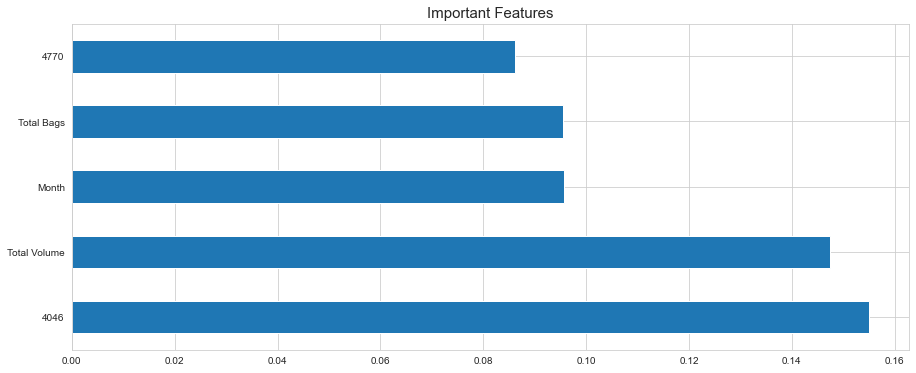

In [50]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()


Here we can see that Avocado total volume is our most important features among all the features.

# PCA

In [51]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_mat = PCA(n_components=12)

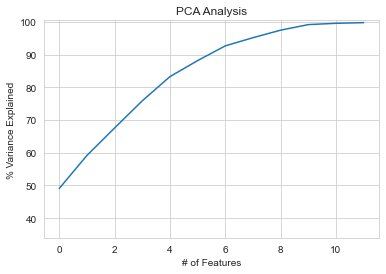

In [52]:
#Calculate Eigenvalues
covar_mat.fit(x)  ## x should be scaled
variance = covar_mat.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_mat.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

Based on the plot above it's clear we should pick 9 features at 99% variance.

In [53]:
x.shape

(18249, 12)

In [54]:
pca=PCA(n_components=9)
x=pca.fit_transform(x)
x.shape

(18249, 9)

# Build the models

In [55]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split


In [56]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
            
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r           

### LINERAR REGRESSION

max r2 score corresponding to 78 is 48.75948754149414


cross validation score -3.2077987606612046


Standard Deviation 34.036611351402364


Training accuracy 46.90298272198407


Test Accuracy 45.451480337235786


MAE 0.0964177361187943


MSE 0.014617648296691705


RMSE 0.12090346685141706




78

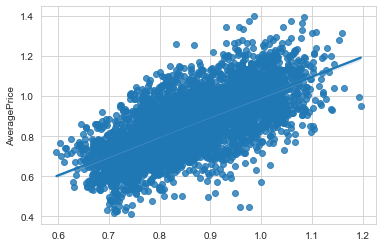

In [57]:
lr=LinearRegression()
maxr2_score(lr,x,y)

### Ridge

max r2 score corresponding to 78 is 48.75916504547132


cross validation score -3.206042655106027


Standard Deviation 34.036618818505694


Training accuracy 46.902982362070155


Test Accuracy 45.45155219097072


MAE 0.09641762435790872


MSE 0.014617629041675573


RMSE 0.12090338722168033




78

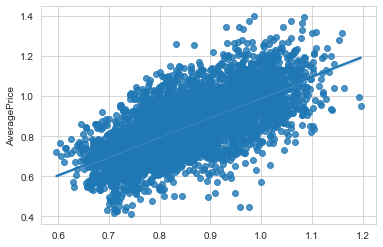

In [58]:
ridge=Ridge()
maxr2_score(ridge,x,y)

### Decision Tree Regressor

max r2 score corresponding to 58 is 64.93919451402384


cross validation score -76.15125288463102


Standard Deviation 77.69537769766978


Training accuracy 100.0


Test Accuracy 61.88886730797073


MAE 0.0700158619916399


MSE 0.010212836889520877


RMSE 0.10105858147391975




58

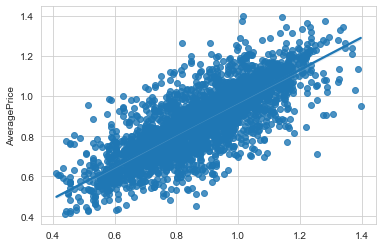

In [59]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

### KNN

max r2 score corresponding to 50 is 78.37393842822733


cross validation score -29.222916033872004


Standard Deviation 44.25301950053096


Training accuracy 85.05388056250149


Test Accuracy 75.99096220181066


MAE 0.05931507775140373


MSE 0.006433825750829269


RMSE 0.08021113233728389




50

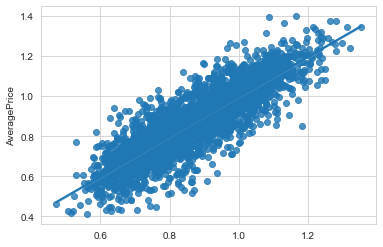

In [60]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

### SVM

max r2 score corresponding to 72 is 75.4781950465513


cross validation score -9.221527694302035


Standard Deviation 35.05209606874545


Training accuracy 76.15511816483364


Test Accuracy 74.2431045234869


MAE 0.06556842756434528


MSE 0.006902208192229403


RMSE 0.08307952932118359




72

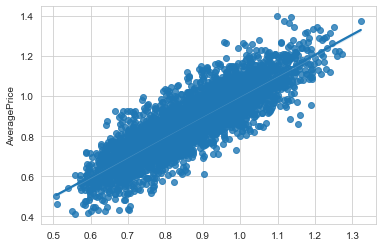

In [61]:
svm = SVR()
maxr2_score(svm,x,y)

### Random Forest

max r2 score corresponding to 78 is 83.18454702426753


cross validation score -7.22581188305792


Standard Deviation 46.948442720567954


Training accuracy 97.47498252323967


Test Accuracy 82.41256434031571


MAE 0.05022687727408061


MSE 0.004712995888859128


RMSE 0.06865126283513748




78

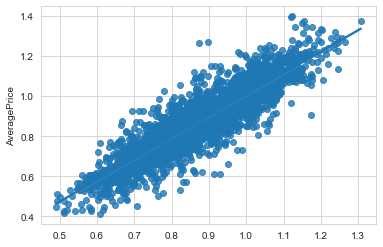

In [62]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

RandomForest gives the best result as accuracy(83) so Random Forest is the best model for this dataset.

## Hyperparameter Tuning

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'n_estimators': 200}

 Mean Absolute Error (MAE) : 4.755030166318079
Mean Squared Error (MSE) : 0.40480759785530745
Root Mean Squared Error : 6.362449197088393
R_2 score: 79.11162835368006


<AxesSubplot:ylabel='AveragePrice'>

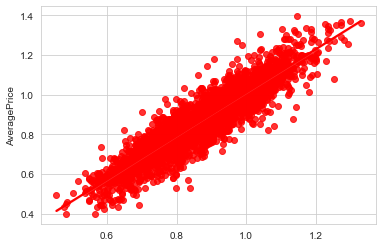

In [64]:
forest=RandomForestRegressor(bootstrap=False,max_depth=50,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

Hyperparameter tuning our R_2 score is 79.01 which is low with param tuning, we will save without hyperparameter tuning RF model.

### saving model

In [65]:
import joblib
joblib.dump(rf,'avacadomodel.pkl')

['avacadomodel.pkl']

### loading 

In [66]:
loaded_model=joblib.load('avacadomodel.pkl')
prediction=loaded_model.predict(x_test)